In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io 
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


Excerise 1: Fourier Transform of Images: we compare the Fourier transform of two different images. 
The following function computes Fourier transform of a given image. Note that high frequencies are shifted to the center of the transformed image.  

In [4]:
def get_fourier_spectrum(img): 
    plt.subplot(121), plt.imshow(img,cmap='gray')
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift)) # compute the magnitude spectrum of the fourier spectrum
    plt.subplot(122), plt.imshow(magnitude_spectrum,cmap ='gray')
    return fshift

Here we plot the magnitude spectrum of two different images. The question is: 
<ul>
  <li>1.a: what is the difference between these two spectrums?</li>
  <li>1.b: What is the source of this difference in spectrums?</li>
</ul>

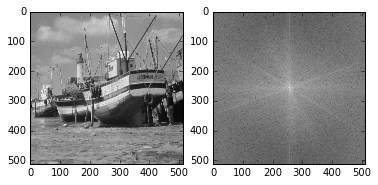

In [5]:
img_boat = io.imread("boat.png")
fshift_boat = get_fourier_spectrum(img_boat)

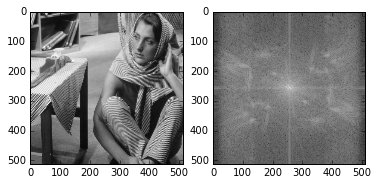

In [6]:
img_barbara = io.imread("barbara.png")
fshift_barbar = get_fourier_spectrum(img_barbara)

You are given the following mask matrix, that you will use it in the next excercise.

0.956935882568


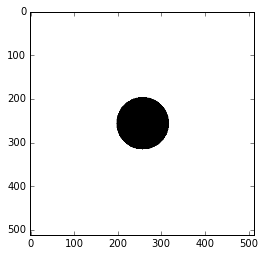

In [9]:
def get_mask(nrows,ncols):
    row, col = np.ogrid[:nrows, :ncols]
    cnt_row, cnt_col = nrows / 2, ncols / 2
    radius = 60
    outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > radius ** 2)
    return outer_disk_mask
mask = get_mask(img_boat.shape[0],img_boat.shape[1])
plt.imshow(mask,cmap = 'gray')
print(sum(mask == True)/(1.0*img_boat.shape[0]*img_boat.shape[1]))

Excercise 2: Use the shifted fourier spectrum and also the above mask to implement a lowpass filtering. Then use inverse fourier transform to recovered the image after lowpass filtering. Apply the lowpass filtering to barbara's image and the boat image. Compared the images before and after lowpass filtering.  
<ul>
  <li>1.a: For which image lowpass filtered imaged is more similar to the orginal image? Why for this image lowpass filtering is more loose?</li>
  <li>1.b: For which image do you suggest lowpass filtering as a sparse coding techinque? Justify your choice.</li>
</ul>